In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Multiple Linear Regression

### Read file with pandas

In [71]:
data = pd.read_csv('cardata.csv')

data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Transmission.1
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,1
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,1
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1


### Delete car's name column

In [72]:
data = data.drop('Car_Name', axis=1)

data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Transmission.1
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,1
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,1
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,1
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1


### Create data frame with the priority od desired columns

In [73]:
df = pd.DataFrame({'Year': data.Year, 'Owner': data.Owner , 'Present_Price': data.Present_Price,
                'Kms_Driven': data.Kms_Driven, 'Fuel_Type': data.Fuel_Type, 'Seller_Type': data.Seller_Type,
                'Transmission': data.Transmission, 'Selling_Price': data.Selling_Price})

df

,Year,Owner,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Selling_Price
0,2014,0,5.59,27000,Petrol,Dealer,Manual,3.35
1,2013,0,9.54,43000,Diesel,Dealer,Manual,4.75
2,2017,0,9.85,6900,Petrol,Dealer,Manual,7.25
3,2011,0,4.15,5200,Petrol,Dealer,Manual,2.85
4,2014,0,6.87,42450,Diesel,Dealer,Manual,4.60
...,...,...,...,...,...,...,...,...
296,2016,0,11.60,33988,Diesel,Dealer,Manual,9.50
297,2015,0,5.90,60000,Petrol,Dealer,Manual,4.00
298,2009,0,11.00,87934,Petrol,Dealer,Manual,3.35
299,2017,0,12.50,9000,Diesel,Dealer,Manual,11.50


### Showing info about data frame

In [74]:
df.describe()

,Year,Owner,Present_Price,Kms_Driven,Selling_Price
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,0.043189,7.628472,36947.205980,4.661296
std,2.891554,0.247915,8.644115,38886.883882,5.082812
min,2003.000000,0.000000,0.320000,500.000000,0.100000
25%,2012.000000,0.000000,1.200000,15000.000000,0.900000
50%,2014.000000,0.000000,6.400000,32000.000000,3.600000
75%,2016.000000,0.000000,9.900000,48767.000000,6.000000
max,2018.000000,3.000000,92.600000,500000.000000,35.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Owner          301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [76]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [77]:
# change Seller_Type column's Type from string to int

df['Seller_Type'] = df['Seller_Type'].map({'Dealer':0, 'Individual':1})

print(df.head())

print(df.dtypes)

print(df.Seller_Type.unique())

print(df.Seller_Type.value_counts())

   Year  Owner  Present_Price  Kms_Driven Fuel_Type  Seller_Type Transmission  \
0  2014      0           5.59       27000    Petrol            0       Manual   
1  2013      0           9.54       43000    Diesel            0       Manual   
2  2017      0           9.85        6900    Petrol            0       Manual   
3  2011      0           4.15        5200    Petrol            0       Manual   
4  2014      0           6.87       42450    Diesel            0       Manual   

   Selling_Price  
0           3.35  
1           4.75  
2           7.25  
3           2.85  
4           4.60  
Year               int64
Owner              int64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type        int64
Transmission      object
Selling_Price    float64
dtype: object
[0 1]
0    195
1    106
Name: Seller_Type, dtype: int64


In [78]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [79]:
# change Fuel_Type column's Type from string to int

df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})

print(df.head())

print(df.dtypes)

print(df.Fuel_Type.unique())


   Year  Owner  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0  2014      0           5.59       27000          0            0   
1  2013      0           9.54       43000          1            0   
2  2017      0           9.85        6900          0            0   
3  2011      0           4.15        5200          0            0   
4  2014      0           6.87       42450          1            0   

  Transmission  Selling_Price  
0       Manual           3.35  
1       Manual           4.75  
2       Manual           7.25  
3       Manual           2.85  
4       Manual           4.60  
Year               int64
Owner              int64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int64
Seller_Type        int64
Transmission      object
Selling_Price    float64
dtype: object
[0 1 2]


In [80]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [81]:
# change Transmission column's Type from string to int

df['Transmission'] = df['Transmission'].map({'Manual':0, 'Automatic':1})

print(df.head())

print(df.dtypes)

print(df.Fuel_Type.unique())

   Year  Owner  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0  2014      0           5.59       27000          0            0   
1  2013      0           9.54       43000          1            0   
2  2017      0           9.85        6900          0            0   
3  2011      0           4.15        5200          0            0   
4  2014      0           6.87       42450          1            0   

   Transmission  Selling_Price  
0             0           3.35  
1             0           4.75  
2             0           7.25  
3             0           2.85  
4             0           4.60  
Year               int64
Owner              int64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int64
Seller_Type        int64
Transmission       int64
Selling_Price    float64
dtype: object
[0 1 2]


## Standardization data

In [82]:
for col in df.columns[:-1]:
    if col != ' Selling_Price':
        df[col] = (df[col] - np.mean(df[col])) / np.std(df[col])
        print(col)

Year
Owner
Present_Price
Kms_Driven
Fuel_Type
Seller_Type
Transmission


In [83]:
for col in df.columns:
    if col != 'Selling_Price':
        Q1, Q3 = np.quantile(df[col], [0.25, 0.75])
        
        IQR = Q3 - Q1

        Max_IQR = Q3 + 1.5 * IQR
        Min_IQR = Q1 - 1.5 * IQR
        
        STD = np.std(df[col])
        
        Max_STD = 3 * STD
        Min_STD = -3 * STD

        df.loc[(df[col] < Min_IQR) & (df[col] < Min_STD), col] = np.nan
        df.loc[(df[col] > Max_IQR) & (df[col] > Max_STD), col] = np.nan
        print(col)

Year
Owner
Present_Price
Kms_Driven
Fuel_Type
Seller_Type
Transmission


In [84]:
df.head()

,Year,Owner,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Selling_Price
0,0.128897,-0.174501,-0.236215,-0.256224,-0.500183,-0.737285,-0.39148,3.35
1,-0.217514,-0.174501,0.221505,0.155911,1.852241,-0.737285,-0.39148,4.75
2,1.168129,-0.174501,0.257427,-0.773969,-0.500183,-0.737285,-0.39148,7.25
3,-0.910335,-0.174501,-0.403079,-0.817758,-0.500183,-0.737285,-0.39148,2.85
4,0.128897,-0.174501,-0.087890,0.141743,1.852241,-0.737285,-0.39148,4.60


### Showing number of NaN values

In [85]:
df.isnull().sum()

Year              3
Owner            11
Present_Price     5
Kms_Driven        3
Fuel_Type         2
Seller_Type       0
Transmission      0
Selling_Price     0
dtype: int64

### Delete NaN values

In [86]:
df.dropna(inplace=True)

df.describe()

,Year,Owner,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Selling_Price
count,277.000000,2.770000e+02,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,0.090129,-1.745006e-01,-0.067346,-0.105771,-0.050080,-0.011701,-0.040526,4.463321
std,0.897227,2.780581e-17,0.737052,0.582816,0.927007,0.998106,0.956035,4.269095
min,-2.988799,-1.745006e-01,-0.846893,-0.938823,-0.500183,-0.737285,-0.391480,0.100000
25%,-0.217514,-1.745006e-01,-0.737968,-0.565326,-0.500183,-0.737285,-0.391480,0.950000
50%,0.475308,-1.745006e-01,-0.177117,-0.159553,-0.500183,-0.737285,-0.391480,3.800000
75%,0.821718,-1.745006e-01,0.255109,0.214640,-0.500183,1.356327,-0.391480,6.000000
max,1.514540,-1.745006e-01,2.663060,2.525687,1.852241,1.356327,2.554408,23.000000


### Graphing columns with target 

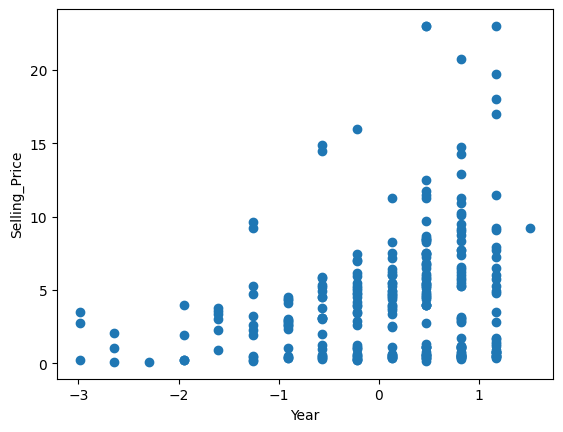

In [87]:
plt.scatter(df.Year, df.Selling_Price)

plt.xlabel('Year')

plt.ylabel('Selling_Price')

plt.show()

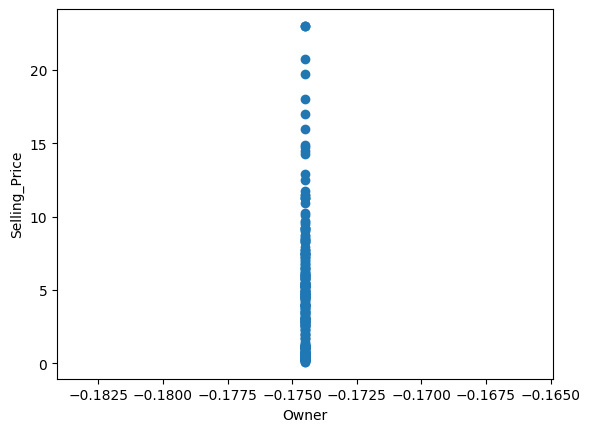

In [88]:
plt.scatter(df.Owner, df.Selling_Price)

plt.xlabel('Owner')

plt.ylabel('Selling_Price')

plt.show()

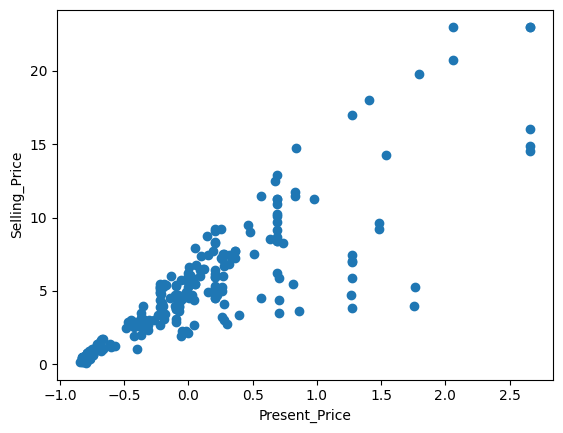

In [89]:

plt.scatter(df.Present_Price, df.Selling_Price)

plt.xlabel('Present_Price')

plt.ylabel('Selling_Price')


plt.show()

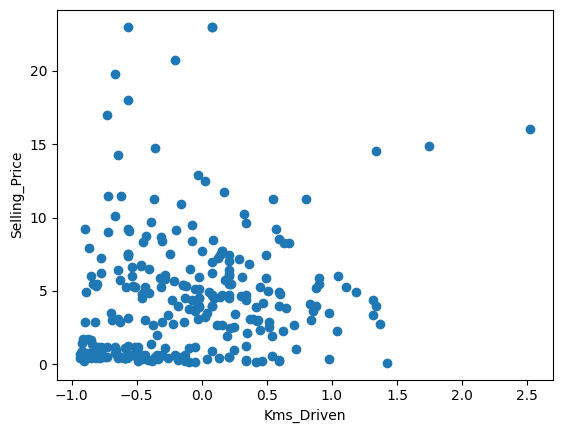

In [90]:
plt.scatter(df.Kms_Driven, df.Selling_Price)

plt.xlabel('Kms_Driven')

plt.ylabel('Selling_Price')

plt.show()

In [91]:
df.head()

,Year,Owner,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Selling_Price
0,0.128897,-0.174501,-0.236215,-0.256224,-0.500183,-0.737285,-0.39148,3.35
1,-0.217514,-0.174501,0.221505,0.155911,1.852241,-0.737285,-0.39148,4.75
2,1.168129,-0.174501,0.257427,-0.773969,-0.500183,-0.737285,-0.39148,7.25
3,-0.910335,-0.174501,-0.403079,-0.817758,-0.500183,-0.737285,-0.39148,2.85
4,0.128897,-0.174501,-0.087890,0.141743,1.852241,-0.737285,-0.39148,4.60


In [92]:
df.dtypes

Year             float64
Owner            float64
Present_Price    float64
Kms_Driven       float64
Fuel_Type        float64
Seller_Type      float64
Transmission     float64
Selling_Price    float64
dtype: object

In [93]:
cdf = df[['Year', 'Owner', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
        'Seller_Type', 'Transmission', 'Selling_Price']]
cdf.head()

,Year,Owner,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Selling_Price
0,0.128897,-0.174501,-0.236215,-0.256224,-0.500183,-0.737285,-0.39148,3.35
1,-0.217514,-0.174501,0.221505,0.155911,1.852241,-0.737285,-0.39148,4.75
2,1.168129,-0.174501,0.257427,-0.773969,-0.500183,-0.737285,-0.39148,7.25
3,-0.910335,-0.174501,-0.403079,-0.817758,-0.500183,-0.737285,-0.39148,2.85
4,0.128897,-0.174501,-0.087890,0.141743,1.852241,-0.737285,-0.39148,4.60


In [94]:
X = cdf[['Year', 'Owner', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
                        'Seller_Type', 'Transmission']].values

X[:5]

array([[ 0.128897  , -0.17450057, -0.23621461, -0.25622446, -0.50018321,
        -0.73728539, -0.39148015],
       [-0.21751369, -0.17450057,  0.22150462,  0.1559105 ,  1.85224094,
        -0.73728539, -0.39148015],
       [ 1.16812909, -0.17450057,  0.25742689, -0.77396901, -0.50018321,
        -0.73728539, -0.39148015],
       [-0.91033509, -0.17450057, -0.40307935, -0.81775835, -0.50018321,
        -0.73728539, -0.39148015],
       [ 0.128897  , -0.17450057, -0.08789041,  0.14174336,  1.85224094,
        -0.73728539, -0.39148015]])

In [95]:
y = cdf[['Selling_Price']].values

y[:5]

array([[3.35],
       [4.75],
       [7.25],
       [2.85],
       [4.6 ]])

### Separating data for starting linear regression

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)

print(f'X_train: {X_train.shape}\n y_train: {y_train.shape}\n X_test: {X_test.shape}\n y_test: {y_test.shape}')

X_train: (221, 7)
 y_train: (221, 1)
 X_test: (56, 7)
 y_test: (56, 1)


In [97]:
regr = linear_model.LinearRegression() 

regr.fit (X_train, y_train)

print ('Coefficients: ', regr.coef_)
print(f'Intercepts: {regr.intercept_}')

Coefficients:  [[ 0.92869906 -0.57065948  4.31673146 -1.19573329  0.69479302 -0.51980591
   0.12667663]]
Intercepts: [4.42054769]


In [98]:
y_pred= regr.predict(X_test)

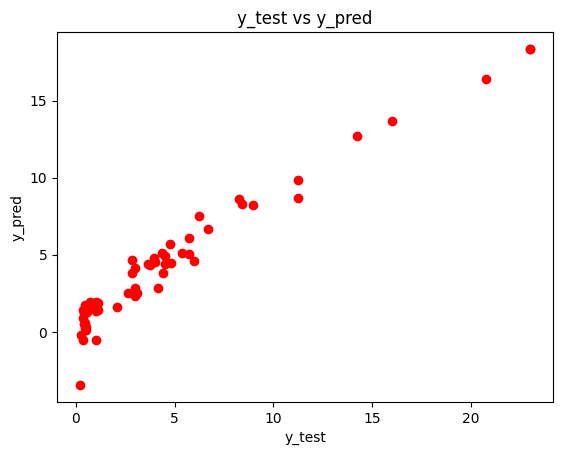

In [99]:
plt.scatter(y_test, y_pred, color='red')

plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.title('y_test vs y_pred')

plt.show()

### Showing evaluation of work

In [100]:
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}")

print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}")

print(f"Root Mean Absolute Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

print(f"R2 Score: {metrics.r2_score(y_test, y_pred)}")

Mean Absolute Error: 1.0147759784528594
Mean Squared Error: 2.1658401307018225
Root Mean Absolute Error: 1.4716793572996199
R2 Score: 0.9275115086501351


### Comparing actual number with number that machine predicted

In [101]:
Compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predict': y_pred.flatten()})

Compare

,Actual,Predict
0,5.75,5.039360
1,0.42,0.533639
2,2.65,2.514754
3,11.25,8.696148
4,23.00,18.356988
5,1.05,-0.551743
6,4.15,2.864358
7,4.00,4.538477
8,6.00,4.572364
9,6.25,7.515108
